In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pyglstudy as gl
from pyglstudy.group_lasso import *
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [8]:
n = 2
p = 10
n_groups = int(p/10)
seed = 0
alpha = 1.0

np.random.seed(seed)
X, beta, y, groups, group_sizes = generate_group_lasso_data(
    n, p, n_groups, rho=0.1
).values()

# IMPORTANT: pack must be created before calling the next cell.
# group_lasso will modify the pack details
pack = generate_group_lasso_state(
    X, y, groups, group_sizes, alpha, 
    log10_min_ratio=-2, 
    max_cds=int(1e5),
    newton_max_iters=10000,
)

In [16]:
pack

CommonPack(groups=array([0], dtype=int32), group_sizes=array([10], dtype=int32), alpha=1.0, penalty=array([1.]), strong_set=array([0], dtype=int32), strong_g1=array([], dtype=int32), strong_g2=array([0], dtype=int32), strong_begins=array([0], dtype=int32), strong_A_diag=array([8.13358331e+00, 1.04294303e+00, 4.77688063e-33, 3.32846667e-32,
       9.26767419e-34, 2.22666455e-33, 2.60709445e-32, 7.82693973e-33,
       1.06958771e-32, 2.03522433e-32]), lmda_max=4.569663845917415, lmdas=array([4.56966385, 4.36196557, 4.1637075 , 3.97446057, 3.79381521,
       3.62138045, 3.45678312, 3.29966699, 3.14969203, 3.00653367,
       2.86988207, 2.7394415 , 2.61492966, 2.49607707, 2.38262652,
       2.27433246, 2.17096054, 2.07228704, 1.97809839, 1.88819077,
       1.80236958, 1.7204491 , 1.64225204, 1.56760915, 1.49635889,
       1.42834707, 1.36342649, 1.30145665, 1.24230344, 1.18583883,
       1.13194063, 1.08049218, 1.03138214, 0.98450423, 0.93975699,
       0.89704359, 0.85627157, 0.81735271, 

In [9]:
pack1 = deepcopy(pack)
pack2 = deepcopy(pack)
pack3 = deepcopy(pack)

In [10]:
%%time
gl_out = group_lasso(X, pack1, fit_type='data')

CPU times: user 144 µs, sys: 222 µs, total: 366 µs
Wall time: 368 µs


In [11]:
%%time
gl_out2 = group_lasso(X, pack2, fit_type='data_newton')

CPU times: user 153 µs, sys: 234 µs, total: 387 µs
Wall time: 384 µs


In [12]:
A = np.asfortranarray(X.T @ X)

In [13]:
%%time
gl_out3 = group_lasso(A, pack3, fit_type='full_cov')

CPU times: user 335 µs, sys: 0 ns, total: 335 µs
Wall time: 334 µs


In [14]:
gl_out['rsqs'] / np.linalg.norm(y) ** 2,  gl_out2['rsqs'] / np.linalg.norm(y) ** 2

(array([0.        , 0.08547716, 0.16342362, 0.23450979, 0.29934649,
        0.35849025, 0.41244809, 0.46168195, 0.50661267, 0.54762366,
        0.58506416, 0.61925234, 0.65047799, 0.67900508, 0.70507404,
        0.72890382, 0.75069381, 0.77062558, 0.78886443, 0.80556086,
        0.82085187, 0.83486214, 0.84770515, 0.85948413, 0.87029303,
        0.88021727, 0.88933457, 0.89771559, 0.90542455, 0.91251986,
        0.91905459, 0.92507696, 0.93063079, 0.9357559 , 0.94048845,
        0.94486131, 0.94890433, 0.95264465, 0.95610691, 0.95931354,
        0.96228491, 0.96503959, 0.96759446, 0.96996491, 0.97216499,
        0.9742075 , 0.97610417, 0.9778657 , 0.97950193, 0.98102187,
        0.9824338 , 0.98374535, 0.98496356, 0.98609492, 0.98714545,
        0.9881207 , 0.98902586, 0.98986571, 0.99064473, 0.99136707,
        0.99203662, 0.99265699, 0.99323157, 0.99376351, 0.99425578,
        0.99471112, 0.99513213, 0.99552122, 0.99588065, 0.99621253,
        0.99651884, 0.99680143, 0.99706202, 0.99

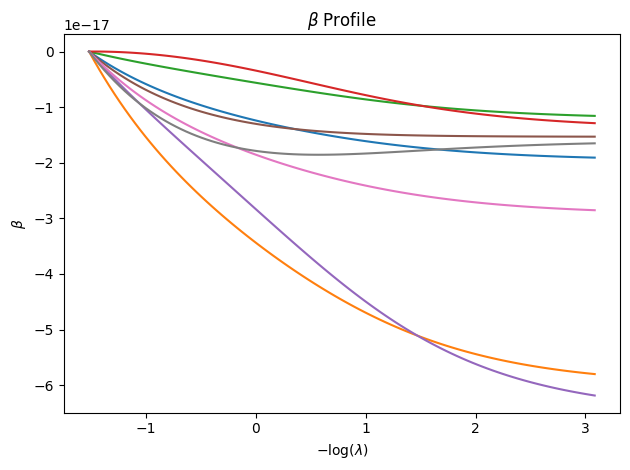

In [15]:
min_idx = np.unravel_index(np.argmin(gl_out['betas']), shape=gl_out['betas'].shape)[0]
max_idx = np.unravel_index(np.argmax(gl_out['betas']), shape=gl_out['betas'].shape)[0]

for j in range(gl_out['betas'].shape[0]):
    if j == min_idx or j == max_idx: continue
    plt.plot(-np.log(gl_out['lmdas']), gl_out['betas'][j].todense().reshape((-1,1)))
plt.title('$\\beta$ Profile')
plt.xlabel('$-\log(\lambda)$')
plt.ylabel('$\\beta$')
plt.tight_layout()
plt.show()

In [19]:
np.max(gl_out['betas']-gl_out3['betas']), np.max(gl_out2['betas'] - gl_out3['betas'])

(3.885780586188048e-16, 9.59290258339962e-10)